## Breast Cancer Classifier
Notebook showcasing [SVM](https://scikit-learn.org/stable/modules/svm.html) as a binary classifier.
The Dataset is a Cancer dataset from [UCI Machine Learning Library](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/)
Below code implements a SVM that will classify Nucleus as malignant (harmful) or benign (not harmful).

<img src="images/Breast_Cancer_Begning_Malignant.png">

### 1- Introduction
The attribute informations are:

ID number
Diagnosis (M = malignant, B = benign)
3 - 32 Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

### 2 - Preparing the data

In [1]:
# importing the libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import time

In [2]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing our cancer dataset
dataset = pd.read_csv('./data/cancer.csv')
X = dataset.iloc[:, 1:31].values
Y = dataset.iloc[:, 31].values

In [4]:
# explore dataset
print("\n \tThe data frame has {0[0]} rows and {0[1]} columns. \n".format(dataset.shape))
#print("Cancer data set dimensions : {}".format(dataset.shape))

dataset.info()

dataset.head()



 	The data frame has 569 rows and 33 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 no

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


As can bee seen above, except for the diagnosis (that is M = malignant or B = benign ) all other features are of type float64 and have 0 non-null numbers.

During the data set loading a extra column was created. We will use the code below to delete this entire column.

In [5]:
dataset.drop(dataset.columns[[-1, 0]], axis=1, inplace=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Now we can count how many diagnosis are malignant (M) and how many are benign (B). This is done below.

In [6]:
diagnosis_all = list(dataset.shape)[0]
diagnosis_categories = list(dataset['diagnosis'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                            diagnosis_categories[0], 
                                                                            diagnosis_categories[1]))


 	 The data has 569 diagnosis, 357 malignant and 212 benign.


### 3 - Visualizing the data


To visualize the dataset, let us use the <a href='https://seaborn.pydata.org'>Seaborn</a> and <a href='https://matplotlib.org/'>Matplotlib</a> packages.

We are interested mainly in the mean values of the features, so we will separate those features in the list below in order to make some work easier and the code more readably.

In [7]:
features_mean= list(dataset.columns[1:11])

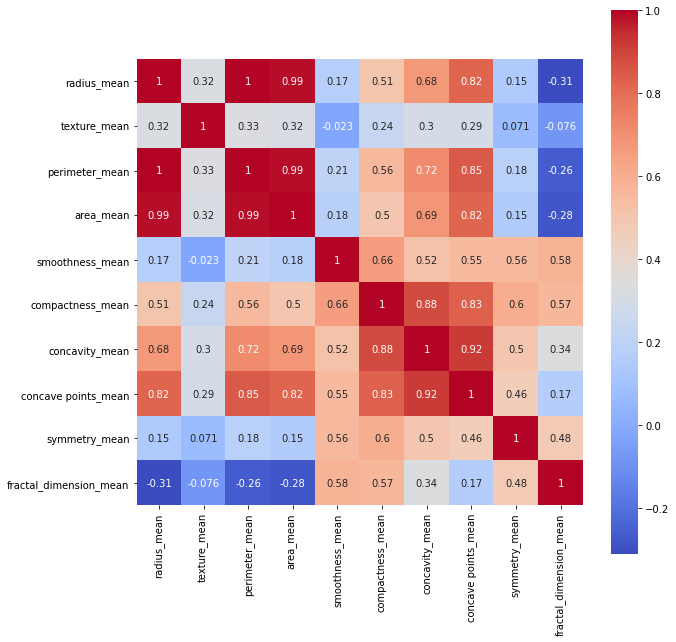

In [8]:
# using Seaborn to create a heat map of the correlations between the features.
plt.figure(figsize=(10,10))
sns.heatmap(dataset[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

It is also possible to create a scatter matrix with the features. The red dots correspond to malignant diagnosis and blue to benign. Look how in some cases reds and blues dots occupies different regions of the plots.

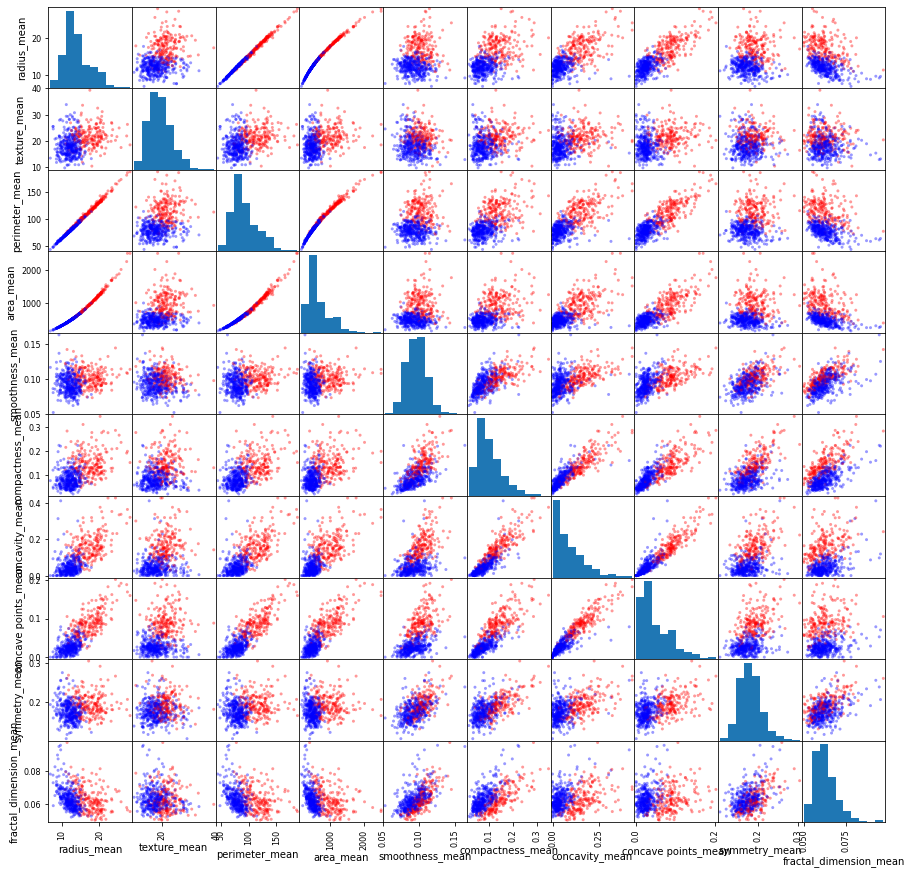

In [9]:
color_dic = {'M':'red', 'B':'blue'}
colors = dataset['diagnosis'].map(lambda x: color_dic.get(x))

sm = scatter_matrix(dataset[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

We can also see how the malignant or benign tumors cells can have (or not) different values for the features plotting the distribution of each type of diagnosis for each of the mean features.

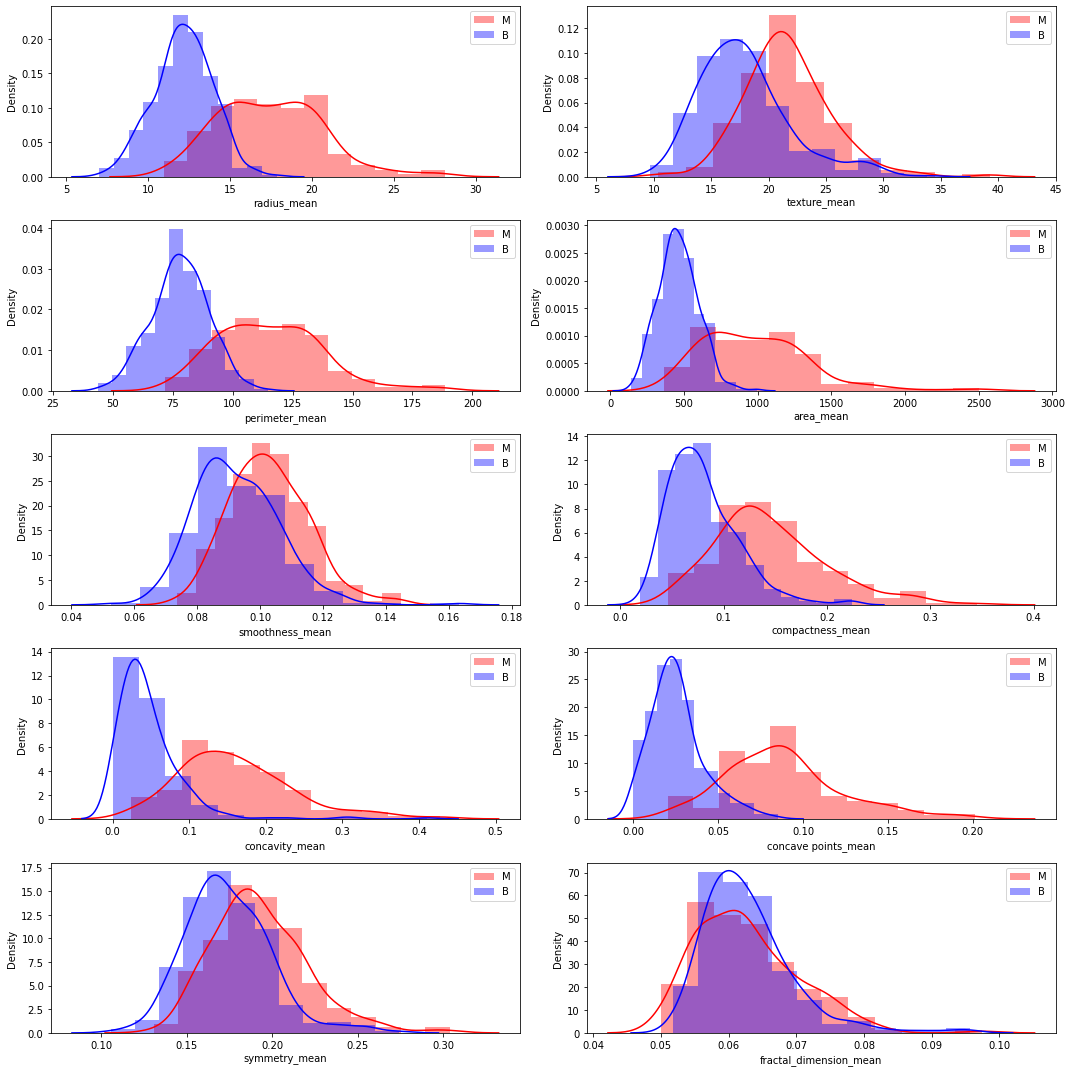

In [10]:
bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(dataset[dataset['diagnosis']=='M'][feature], bins=bins, color='red', label='M');
    sns.distplot(dataset[dataset['diagnosis']=='B'][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Still another form of doing this could be using box plots, which is done below.

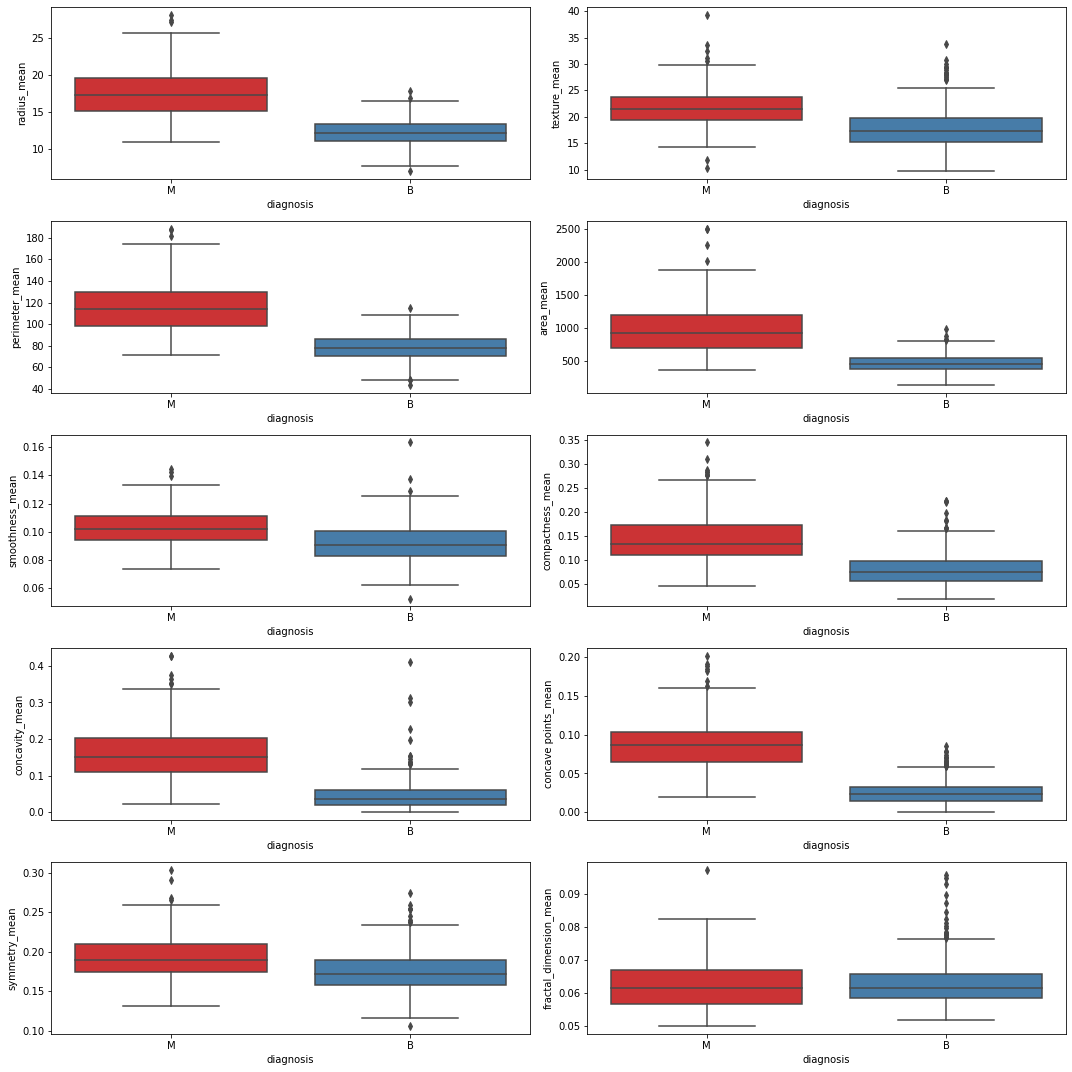

In [11]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='diagnosis', y=feature, data=dataset, palette="Set1")

plt.tight_layout()
plt.show()


As we saw above, some of the features can have, most of the times, values that will fall in some range depending on the diagnosis been malignant or benign. We will select those features to use in the next section.

In [12]:
# keep the 6 features that seem to best help predict the diagnosis
features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

### 4 - Machine Learning with SVM

The problem we are dealing with here is a classification problem. We will use <a href='https://scikit-learn.org/stable/modules/svm.html'>Support Vector Machine</a> (SVM) for now, and evaluate other ML algorithms in a separate notebook.



The algorithms will process only numerical values. For this reason, we will transform the categories M and B into values 1 and 0, respectively.

In [13]:
diag_map = {'M':1, 'B':0}
#dataset['diagnosis'] = dataset['diagnosis'].map(diag_map)
dataset['diagnosis'] = dataset['diagnosis'].apply(lambda x: 0 if x=='B' else 1)

print(dataset[15:22]['diagnosis'])



15    1
16    1
17    1
18    1
19    0
20    0
21    0
Name: diagnosis, dtype: int64


Our aim is to construct a "function" y = f(X) such that the value of y (1 or 0) will be determined once we input the values X into f. The "function" f will be construct by the machine learning algorithm based on the ys and Xs that are already known.


After training our machine learning algorithm we need to test its accuracy.  
In order to avoid Overfitting we will use the function *train_test_split* to split the data randomly (random_state = 109) into a train and a test set. The test set will correspond to 20% of the total data (test_size = 0.2).

In [14]:
X = dataset.loc[:, features_mean]
#X = dataset
y = dataset.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 109)

accuracy_all = []
cvs_all = []

Now we will use an SVM classifier, with standard parameters.
Steps:
 1. the classifier clf is initialized;  
 2. the classifier clf is fitted with the train data set X_train and y_train;  
 3. the predictions are found using X_test;  
 4. the accuracy is estimated with help of cross-validation;  
 5. the accuracy of the predictions is measured.  
 6. At the end the results are presents in %, along with the total time needed to run all the process.  



In [15]:
# C-Support Vector Classification.
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
start = time.time()

clf = SVC(gamma='auto')
#clf = SVC(gamma='scale')
#clf = SVC(kernel='linear', gamma='auto')
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))



# Nu-Support Vector Classification.
# Similar to SVC but uses a parameter to control the number of support vectors.
# NuSVC(nu=0.5, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)[source]
start = time.time()

clf = NuSVC(gamma='auto')
clf.fit(X_train, y_train)
prediciton = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("NuSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))



# Linear Support Vector Classification.
# Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
# LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
start = time.time()

clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("LinearSVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

SVC Accuracy: 65.79%
Cross validation score: 71.70% (+/- 4.25%)
Execution time: 0.13763 seconds 

NuSVC Accuracy: 65.79%
Cross validation score: 71.88% (+/- 4.05%)
Execution time: 0.067921 seconds 

LinearSVC Accuracy: 93.86%
Cross validation score: 87.36% (+/- 13.09%)
Execution time: 0.99596 seconds 



 ### 5 - Adjust SVM Hyper parameters
 - C: It is the regularization parameter, C, of the error term.
 - kernel: It specifies the kernel type to be used in the algorithm.
It can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, or a callable. The default value is ‘rbf’.
 - degree: It is the degree of the polynomial kernel function (‘poly’)and is ignored by all other kernels. The default value is 3.
 - gamma: It is the kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’.
If gamma is ‘auto’, then 1/n_features will be used instead.

The function for tuning the parameters available in scikit-learn is called gridSearchCV().
```sklearn.model_selection.GridSearchCV(estimator, param_grid)```

In [16]:
# making the instance
clf_model = SVC()

# Hyper Parameters Set
params = [
    {'C': [1, 2, 3, 4, 5, 10, 100], 'kernel': ['linear']},
    {'C': [1, 10, 100], 'gamma': [0.001, 0.0001, 'auto'], 'kernel': ['rbf']}
]
# params = {'C': [1, 5, 6, 7, 8, 9, 10, 11, 12, 100, 1000],
#          'kernel': ['linear', 'rbf'],
#          'gamma': [0.001, 0.0001]}

# Making models with hyper parameters sets
model1 = GridSearchCV(clf_model, param_grid=params, n_jobs=-1, cv=5)
# Learning
model1.fit(X_train, y_train)
# The best hyper parameters set
print("\nBest Hyper Parameters:\n", model1.best_params_)

# Prediction
y_pred = model1.predict(X_test)

# Model evaluation
# importing the metrics module
from sklearn import metrics
# evaluation(Accuracy)
print("SVM Best Accuracy with hyper parameters: {0:.5%}".format(metrics.accuracy_score(y_pred, y_test)))

# evaluation(Confusion Matrix)
print("Confusion Matrix:\n", metrics.confusion_matrix(y_pred, y_test))
print(" - Precision:  {0:.2%}".format(metrics.precision_score(y_test, y_pred)))
print(" - Recall:  {0:.2%}".format(metrics.recall_score(y_test, y_pred)))



Best Hyper Parameters:
 {'C': 100, 'kernel': 'linear'}
SVM Best Accuracy with hyper parameters: 92.10526%
Confusion Matrix:
 [[70  5]
 [ 4 35]]
 - Precision:  89.74%
 - Recall:  87.50%


In [17]:
# Training the model with the hyper parameters found from hyper-parameter optimization
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

clf = SVC(C=100, kernel='linear')

start = time.time()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)
end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SVC Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


SVC Accuracy: 92.11%
Cross validation score: 91.74% (+/- 3.24%)
Execution time: 32.493 seconds 



Last note - we should keep tuning this algorithm by
 - improving accuracy
 - minimizing the false positives (more acceptable) than false negatives
And hence we want to optimize this hyper parameter tuning job using precision.
